# Align measured with annotated spectra

In [26]:

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
!pip install dtw-python

In [28]:
import sys
sys.path.append("..")

import pandas as pd
import matchms
from matchms.importing import load_from_msp
from data_utils import spectrum_processing
from pipeline_utils import get_galaxy_filename

def get_spectra(path):
    spectrums = [spectrum_processing(s, min_rel_int=None, n_required_peaks=1) for s in load_from_msp(path, metadata_harmonization=False)]
    # Omit spectrums that didn't qualify for analysis
    spectrums = [s for s in spectrums if s is not None]
    return spectrums

In [29]:
model = "GPT2"

ground = pd.read_csv("tmp/6_KC_Confirmed_seminalplasma.csv.csv")
library = get_spectra("tmp/5_rcx_gc-orbitrap_metabolites_20210817.msp.msp")
measured = get_spectra(get_galaxy_filename(f"_{model}", "tmp"))
matches = pd.read_csv(get_galaxy_filename(f"- {model}", "tmp"), sep="\t")

In [30]:
ground["RT"] = ground["Average Rt(min)"]*60
ground = ground.sort_values(by=['RT'], ascending=True) 

In [31]:
# super inefficent variant :))
def get_RTI(c_ids, measured):
    rts =[]
    ris = []
    for c_id in c_ids:
        for spectrum in measured:
            if c_id == spectrum.metadata["compound_name"]:
                rts.append(spectrum.metadata["retention_time"])
                ris.append(spectrum.metadata["retention_index"])
                break
    return rts, ris
matches["RT"], matches["RI"] = get_RTI(matches["query"], measured)

matches = matches.sort_values(by=['RT'], ascending=True) 

In [32]:
measured[0].metadata

{'ionmode': 'Negative',
 'spectrumtype': 'Centroid',
 'num_peaks': '10',
 'compound_name': 'C34',
 'retention_time': '121.54',
 'retention_index': '1076.441224'}

In [33]:
# select library spectra present in ground
ground

# add RT column to the selected library spectra


# sort selected library spectra by RT

,Average Rt(min),Average RI,Metabolite name,RT
0,2.484,1224.68,2-Methylmalonic acid_2TMS,149.04
33,2.615,1266.17,Leucine_2TMS,156.90
31,2.691,1288.34,Isoleucine_2TMS,161.46
47,2.718,1296.42,Proline_2TMS,163.08
26,2.744,1303.46,Glycine_3TMS,164.64
...,...,...,...,...
57,5.793,2234.36,Stearic acid_1TMS,347.58
55,5.832,2247.44,Spermidine_5TMS,349.92
56,7.086,2740.02,Spermine_6TMS,425.16
37,8.709,3529.40,Maltotriose_11TMS isomer 1,522.54


In [34]:
matches

,query,reference,matches,score,RT,RI
91,C35,Alanine_2TMS,1,0.000124,130.03,1129.444444
28,C09,Urea_3TMS,1,0.003357,142.84,1194.141414
122,C56,Valine_2TMS,3,0.884027,145.78,1208.72549
110,C43,Urea_2TMS,2,0.566104,149.64,1227.647059
111,C46,Leucine_2TMS,4,0.958918,159.77,1277.303922
...,...,...,...,...,...,...
39,C11,Acetylglucosamine_5TMS isomer 2,6,0.142404,322.27,2087.055556
41,C11,Myo-inositol_6TMS,13,0.915567,322.27,2087.055556
35,C11,Acetylgalactosamine_4TMS,5,0.103987,322.27,2087.055556
107,C39,Stearic acid_1TMS,6,0.417137,347.74,2238.555556


In [35]:
from dtw import *
alignment = dtw(query, template, keep_internals=True)

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



NameError: name 'query' is not defined

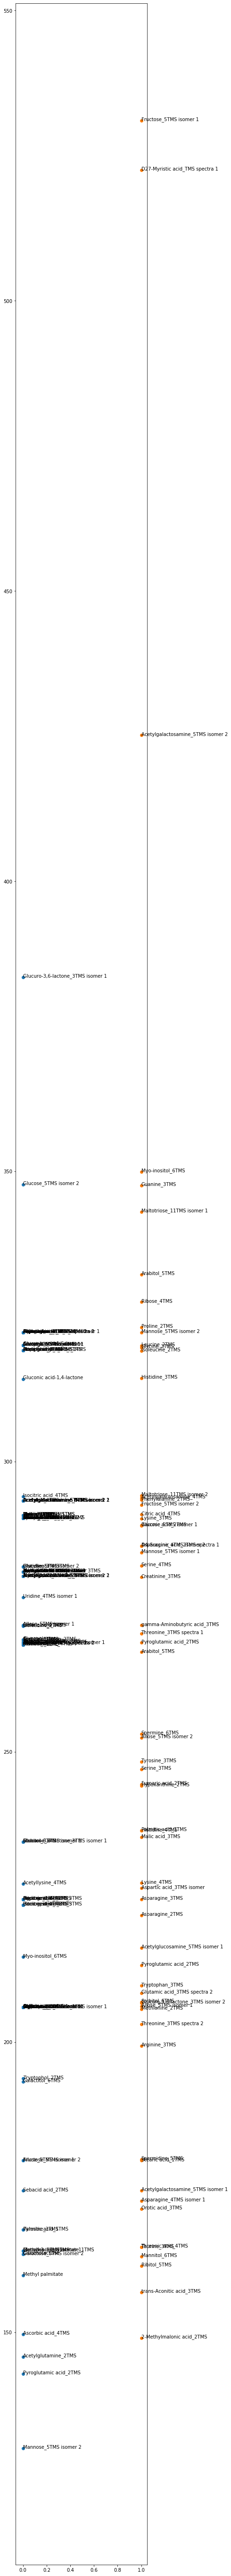

In [54]:
import matplotlib.pyplot as plt
import numpy as np
y1 = matches.RT.astype(float)
y2 = ground.RT
x1,x2 = np.repeat(0, len(matches)), np.repeat(1, len(ground))
n1 = matches.reference
n2 = ground["Metabolite name"]

fig, ax = plt.subplots(figsize=(5, 100))
ax.scatter(x1, y1)
ax.scatter(x2, y2)

for i, txt in enumerate(n1):
    ax.annotate(txt, (x1[i], y1[i]))
for i, txt in enumerate(n2):
    ax.annotate(txt, (x2[i], y2[i]))


In [42]:
y1.to_list()

['130.03',
 '142.84',
 '145.78',
 '149.64',
 '159.77',
 '163.42',
 '163.42',
 '164.06',
 '164.06',
 '164.06',
 '167.64',
 '167.64',
 '174.39',
 '179.57',
 '179.57',
 '193.16',
 '193.71',
 '205.96',
 '205.96',
 '205.96',
 '205.96',
 '205.96',
 '205.96',
 '205.96',
 '205.96',
 '205.96',
 '205.96',
 '205.96',
 '205.96',
 '214.66',
 '223.64',
 '223.64',
 '223.64',
 '223.64',
 '224.6',
 '224.6',
 '224.6',
 '224.6',
 '224.6',
 '224.6',
 '227.26',
 '234.49',
 '234.49',
 '234.49',
 '268.41',
 '268.41',
 '268.41',
 '268.64',
 '268.64',
 '268.64',
 '268.64',
 '268.64',
 '268.65',
 '268.73',
 '268.73',
 '268.91',
 '268.91',
 '268.91',
 '269.28',
 '269.28',
 '269.28',
 '269.28',
 '271.63',
 '271.71',
 '271.72',
 '271.82',
 '276.62',
 '280.24',
 '280.24',
 '280.24',
 '280.24',
 '280.24',
 '280.24',
 '280.24',
 '281.04',
 '281.04',
 '281.04',
 '281.04',
 '281.04',
 '281.04',
 '281.04',
 '281.04',
 '281.04',
 '281.04',
 '281.04',
 '281.04',
 '281.04',
 '281.86',
 '281.86',
 '281.86',
 '290.22',
 '290

In [43]:
y2.to_list()

[149.04,
 156.9,
 161.45999999999998,
 163.07999999999998,
 164.64000000000001,
 164.70000000000002,
 171.24,
 172.61999999999998,
 174.42000000000002,
 179.57999999999998,
 179.76,
 199.32,
 203.04,
 205.68,
 206.16,
 206.76000000000002,
 206.88,
 208.44,
 209.70000000000002,
 213.23999999999998,
 216.24,
 221.82,
 224.57999999999998,
 226.5,
 227.4,
 235.26,
 236.4,
 236.45999999999998,
 244.14,
 244.38000000000002,
 247.02,
 248.28,
 252.42,
 253.07999999999998,
 267.18,
 268.8,
 270.36,
 271.8,
 280.08,
 282.06,
 284.34,
 285.48,
 285.48,
 288.96,
 289.02,
 290.16,
 290.88,
 292.56,
 293.4,
 293.76,
 294.17999999999995,
 314.40000000000003,
 319.08,
 319.68,
 319.98,
 322.26000000000005,
 323.16,
 327.48,
 332.21999999999997,
 343.02,
 347.58,
 349.92,
 425.16,
 522.54,
 531.0600000000001]